Step 1 - DataFrame dfASX:
     Month of Date       Date  ASX200   10 AED   10 CNY  10,000 IDR  100 INR  \
0        July 2010   7/1/2010    4238  0.30724  0.56739      0.7609   0.3904   
1        July 2010   7/2/2010    4239  0.31025  0.57224      0.7650   0.3943   
2        July 2010   7/3/2010    4239  0.31025  0.57224      0.7650   0.3943   
3        July 2010   7/4/2010    4239  0.31025  0.57224      0.7650   0.3943   
4        July 2010   7/5/2010    4222  0.31018  0.57217      0.7655   0.3944   
...            ...        ...     ...      ...      ...         ...      ...   
3648    April 2013  4/24/2013    5102  0.37658  0.63346      0.9970   0.5577   
3649    April 2013  4/23/2013    5016  0.37592  0.63229      0.9956   0.5562   
3650    April 2013  4/30/2013    5191  0.38076  0.63919      1.0081   0.5622   
3651    April 2013  4/25/2013    5102  0.37658  0.63346      0.9970   0.5577   
3652    April 2013  4/10/2013    4968  0.38580  0.65064      1.0186   0.5728   

      100 JPY

[*********************100%%**********************]  3 of 3 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['12953', '12705', '13078']: Exception('%ticker%: No timezone found, symbol may be delisted')


DataFrame 'df' is empty. No data to visualize.

Step 6 - Summary Statistics of Returns:
Price  Adj Close             Close              High               Low        \
Ticker     12705 12953 13078 12705 12953 13078 12705 12953 13078 12705 12953   
count        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Price         Open             Volume              
Ticker 13078 12705 12953 13078  12705 12953 13078  
count  

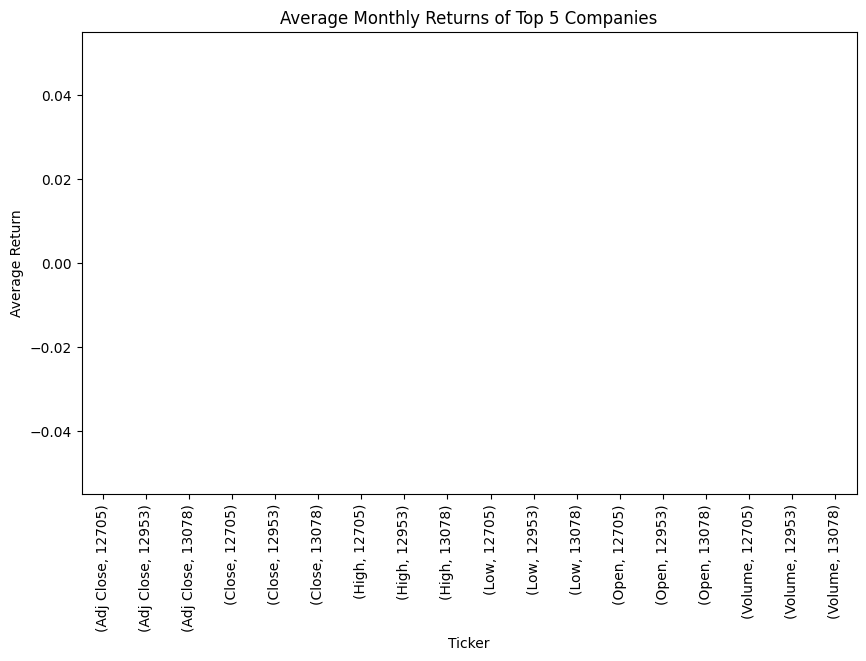

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


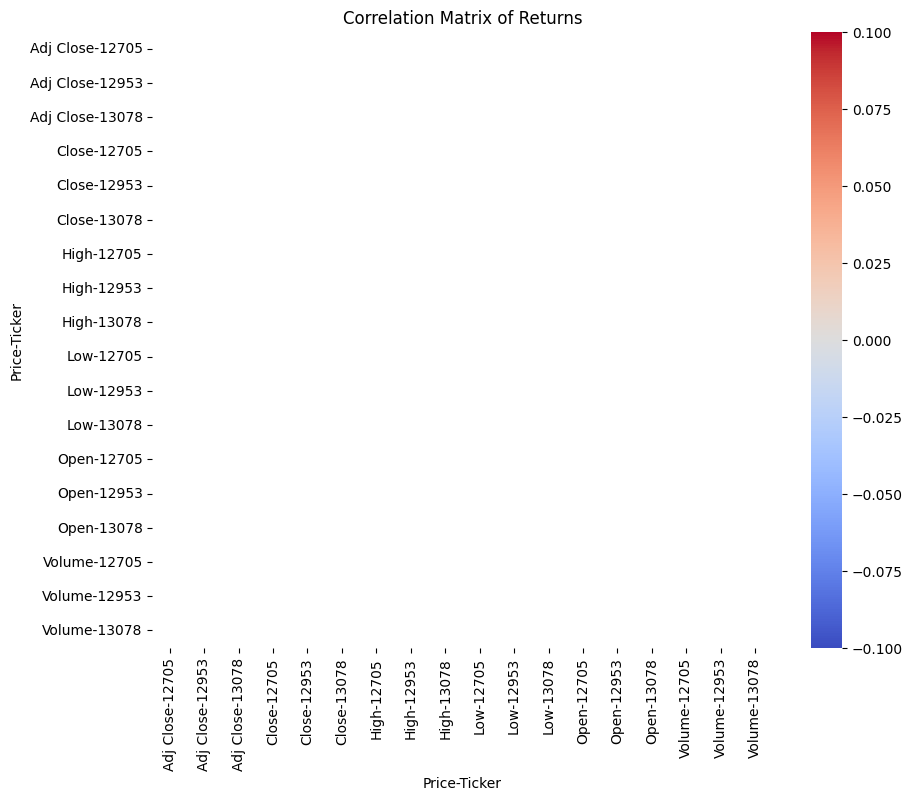

In [34]:
# Import necessary libraries
import pandas as pd
import random
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data into a DataFrame
dfASX = pd.read_csv('ASX200.csv')

# Print the dataframe dfASX
print("Step 1 - DataFrame dfASX:")
print(dfASX)

# Obtain a list of tickers of ASX200 companies
ASXlist = dfASX['ASX200'].tolist()

# Print the list of tickers
print("\nStep 2 - List of ASX200 Tickers:")
print(ASXlist)

# Set seed and sample 20 stocks
random.seed(5231360)  # Set seed based on student number
sampled_tickers = sorted(random.sample(ASXlist, 20))

# Create DataFrame dfASX20
dfASX20 = dfASX[dfASX['ASX200'].isin(sampled_tickers)].reset_index(drop=True)

# Print dfASX20
print("\nStep 3 - DataFrame dfASX20:")
print(dfASX20)

# Rank dfASX20 by ESG value in descending order
dfASX20 = dfASX20.sort_values(by='DAX', ascending=False).reset_index(drop=True)

# Print dfASX20 after ranking
print("\nStep 4 - DataFrame dfASX20 ranked by ESG score:")
print(dfASX20)

# Choose top 5 companies based on ESG score
dfASX5 = dfASX20.head(5)

# Print dfASX5
print("\nStep 5 - Top 5 companies based on ESG score:")
print(dfASX5)

# Obtain monthly share price data for the top 5 companies from Yahoo Finance
start_date = '2021-12-01'
end_date = '2024-03-31'

# Convert ticker symbols to strings
tickers = [str(ticker) for ticker in dfASX5['DAX'].tolist()]

# Download data
df = yf.download(tickers, start=start_date, end=end_date)

# Calculate monthly returns
dfr = df.pct_change()

# Normalize stock prices and visualize time-series movement
if not df.empty:  # Check if df contains data
    normalized_prices = (df / df.iloc[0])
    normalized_prices.plot(figsize=(12, 6))
    plt.title('Normalized Stock Prices of Top 5 Companies')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend(title='Ticker')
    plt.show()
else:
    print("DataFrame 'df' is empty. No data to visualize.")

# Summary statistics of returns
summary_stats = dfr.describe()
print("\nStep 6 - Summary Statistics of Returns:")
print(summary_stats)

# Visualize average returns using bar plot
average_returns = dfr.mean()
average_returns.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Returns of Top 5 Companies')
plt.xlabel('Ticker')
plt.ylabel('Average Return')
plt.show()

# Correlation matrix and heatmap
correlation_matrix = dfr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Returns')
plt.show()
